<a href="https://colab.research.google.com/github/IsadoraPrevitalle/TCC-Eficiencia_RedesNeurais_PrevisaoSeriesFinanceiras/blob/Redes_Neurais/previsao_serie_temporal_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('all_bovespaCor.csv', sep=',')
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_min,preco_fechamento,qtd_negocios,volume_negocios
0,2020-01-02,AALR3,ALLIAR,1829.0,1900.0,1828.0,19.00,585800.0,1.094620e+09
1,2020-01-02,AAPL34,APPLE,12000.0,12134.0,12000.0,121.34,12700.0,1.533380e+08
2,2020-01-02,ABCB4,ABC BRASIL,2000.0,2030.0,1982.0,20.30,870400.0,1.745788e+09
3,2020-01-02,ABEV3,AMBEV S/A,1886.0,1925.0,1878.0,19.20,16011300.0,3.062348e+10
4,2020-01-02,ADHM3,ADVANCED-DH,255.0,255.0,235.0,2.48,193400.0,4.719270e+07
...,...,...,...,...,...,...,...,...,...
500826,2022-11-25,EMAE4,EMAE,4000.0,4108.0,4000.0,41.08,600.0,2.417400e+06
500827,2022-11-25,EMBR3,EMBRAER,1450.0,1464.0,1430.0,14.31,3989300.0,5.763856e+09
500828,2022-11-25,INEP3,INEPAR,120.0,134.0,118.0,1.26,7311600.0,9.272758e+08
500829,2022-11-25,INEP4,INEPAR,109.0,120.0,105.0,1.11,2672500.0,3.037508e+08


In [ ]:
df['data_pregao'] = pd.to_datetime(df['data_pregao'], format='%Y-%m-%d')

In [ ]:
#filtrar Ação:
df_acao=df [df['sigla_acao'] == 'PETR4']
df_acao = df_acao.sort_values(by='data_pregao')
df_acao

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_max,preco_min,preco_fechamento,qtd_negocios,volume_negocios
262,2020-01-02,PETR4,PETROBRAS,3051.0,3070.0,3031.0,30.70,37774500.0,1.154777e+11
997,2020-01-03,PETR4,PETROBRAS,3088.0,3124.0,3045.0,30.45,71595600.0,2.204408e+11
998,2020-01-06,PETR4,PETROBRAS,3043.0,3094.0,2995.0,30.81,81844000.0,2.513704e+11
2550,2020-01-07,PETR4,PETROBRAS,3082.0,3088.0,3047.0,30.69,32822000.0,1.006116e+11
2551,2020-01-08,PETR4,PETROBRAS,3069.0,3077.0,3024.0,30.50,48215600.0,1.469849e+11
...,...,...,...,...,...,...,...,...,...
466738,2022-12-23,PETR4,PETROBRAS,2413.0,2522.0,2413.0,25.12,68387900.0,1.698360e+11
466614,2022-12-26,PETR4,PETROBRAS,2512.0,2530.0,2482.0,24.94,28765200.0,7.179042e+10
467539,2022-12-27,PETR4,PETROBRAS,2525.0,2531.0,2455.0,25.11,50803200.0,1.264727e+11
476902,2022-12-28,PETR4,PETROBRAS,2510.0,2532.0,2475.0,24.80,57293500.0,1.432444e+11


In [ ]:
df_acao_fec = df_acao[['data_pregao', 'preco_fechamento']]
df_acao_fec

,data_pregao,preco_fechamento
262,2020-01-02,30.70
997,2020-01-03,30.45
998,2020-01-06,30.81
2550,2020-01-07,30.69
2551,2020-01-08,30.50
...,...,...
466738,2022-12-23,25.12
466614,2022-12-26,24.94
467539,2022-12-27,25.11
476902,2022-12-28,24.80


In [ ]:
#ajustar index
df_acao_fec = df_acao_fec.set_index(pd.DatetimeIndex(df_acao_fec['data_pregao'].values))
df_acao_fec

,data_pregao,preco_fechamento
2020-01-02,2020-01-02,30.70
2020-01-03,2020-01-03,30.45
2020-01-06,2020-01-06,30.81
2020-01-07,2020-01-07,30.69
2020-01-08,2020-01-08,30.50
...,...,...
2022-12-23,2022-12-23,25.12
2022-12-26,2022-12-26,24.94
2022-12-27,2022-12-27,25.11
2022-12-28,2022-12-28,24.80


In [ ]:
df_acao_fec.drop('data_pregao',axis=1,inplace=True)
df_acao_fec

,preco_fechamento
2020-01-02,30.70
2020-01-03,30.45
2020-01-06,30.81
2020-01-07,30.69
2020-01-08,30.50
...,...
2022-12-23,25.12
2022-12-26,24.94
2022-12-27,25.11
2022-12-28,24.80


In [ ]:
df_sorted = df_acao_fec.sort_index()
df_sorted

,preco_fechamento
2020-01-02,30.70
2020-01-03,30.45
2020-01-06,30.81
2020-01-07,30.69
2020-01-08,30.50
...,...
2022-12-23,25.12
2022-12-26,24.94
2022-12-27,25.11
2022-12-28,24.80


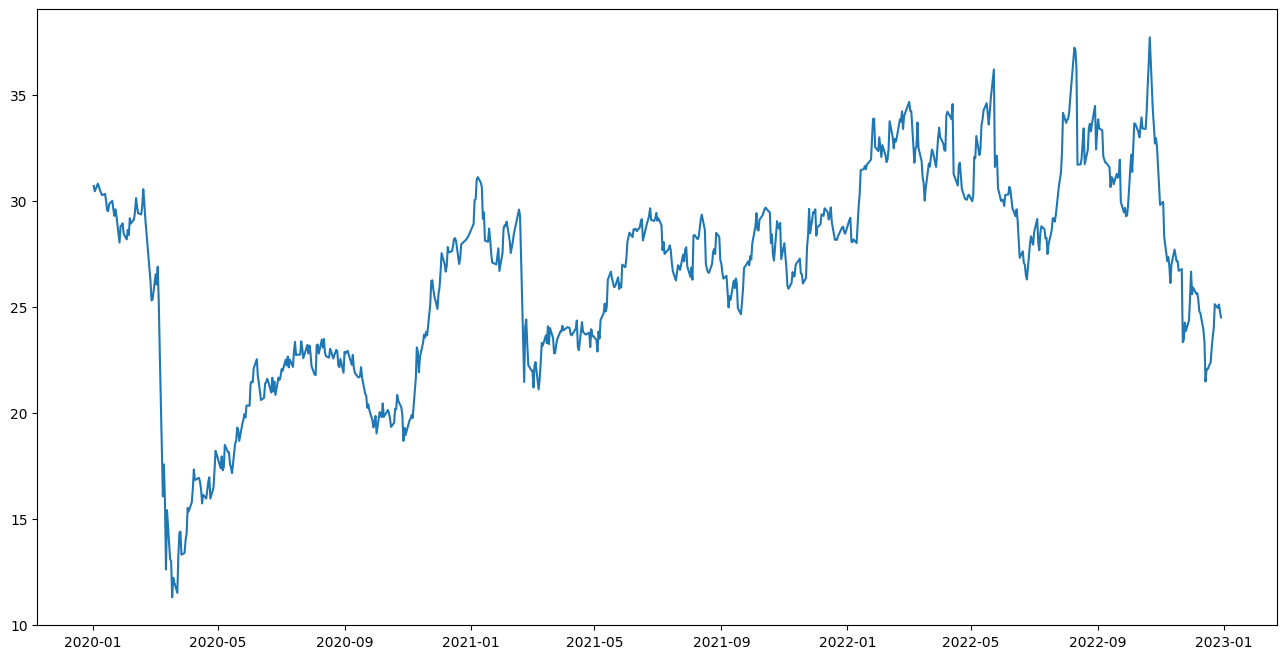

In [ ]:

plt.figure(figsize=(16,8))
plt.plot(df_sorted)


In [ ]:
#Verificando a quantidade de linhas
qtd_linha = len(df_sorted)

qtd_linha_treino = round(.70 * qtd_linha)
qtd_linha_teste = qtd_linha - qtd_linha_treino

info = (
    f"linhas treino= 0:{qtd_linha_treino}"
    f" linhas teste= {qtd_linha_treino}:{qtd_linha_treino + qtd_linha_teste}"
)

info

'linhas treino= 0:522 linhas teste= 522:746'

In [ ]:
#Normalizar os dados
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_sorted)

In [ ]:
#separando treino e teste
train = df_scaler[:qtd_linha_treino]
test = df_scaler[qtd_linha_treino: qtd_linha_treino+qtd_linha_teste]

print (len(train), len(test))

522 224


In [ ]:
#Convertendo em array os valores da df matriz
def create_df(df, steps = 1):
  dataX, dataY = [], []
  for i in range (len(df) - steps-1):
    a = df[i:(i+steps), 0]
    dataX.append(a)
    dataY.append(df[i+steps, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
steps = 15
X_train , Y_train = create_df(train, steps)
X_test, Y_test = create_df(test, steps)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(506, 15)
(506,)
(208, 15)
(208,)


In [ ]:
#gerando dados para o modelo
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:

model = Sequential()
model.add(LSTM(35, return_sequences=True, input_shape=(steps, 1)))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35))
model.add(Dropout(0.2))
model.add(Dense(1))

print(model)

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7cf7116a33d0>>

In [ ]:
#Treinamento do modelo
validation = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=15, verbose=2)

Epoch 1/100
34/34 - 11s - loss: 0.3866 - val_loss: 0.3803 - 11s/epoch - 320ms/step
Epoch 2/100
34/34 - 1s - loss: 0.2094 - val_loss: 0.3583 - 1s/epoch - 30ms/step
Epoch 3/100
34/34 - 1s - loss: 0.1887 - val_loss: 0.2722 - 946ms/epoch - 28ms/step
Epoch 4/100
34/34 - 1s - loss: 0.1248 - val_loss: 0.2314 - 990ms/epoch - 29ms/step
Epoch 5/100
34/34 - 1s - loss: 0.1045 - val_loss: 0.1719 - 946ms/epoch - 28ms/step
Epoch 6/100
34/34 - 1s - loss: 0.0899 - val_loss: 0.1621 - 995ms/epoch - 29ms/step
Epoch 7/100
34/34 - 1s - loss: 0.0919 - val_loss: 0.1562 - 1s/epoch - 29ms/step
Epoch 8/100
34/34 - 1s - loss: 0.0742 - val_loss: 0.1460 - 1s/epoch - 32ms/step
Epoch 9/100
34/34 - 1s - loss: 0.0759 - val_loss: 0.1869 - 1s/epoch - 42ms/step
Epoch 10/100
34/34 - 1s - loss: 0.0721 - val_loss: 0.1463 - 1s/epoch - 36ms/step
Epoch 11/100
34/34 - 1s - loss: 0.0703 - val_loss: 0.1395 - 964ms/epoch - 28ms/step
Epoch 12/100
34/34 - 1s - loss: 0.0712 - val_loss: 0.1579 - 960ms/epoch - 28ms/step
Epoch 13/100
34/

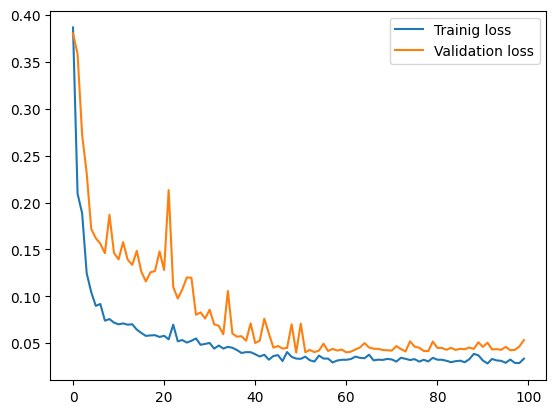

In [ ]:
plt.plot(validation.history['loss'], label='Trainig loss')
plt.plot(validation.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
#Fazendo a previsão
prev = model.predict(X_test)
prev = scaler.inverse_transform(prev)
prev

In [ ]:
#Previsao para os próximos 10 dias
lenght_test = len(test)
lenght_test

224

In [ ]:
#Pegar os ultimos dias que são o tamanho do meu stap
days_input_steps = lenght_test - steps
days_input_steps

209

In [ ]:
#Transforma em array
input_steps = test[days_input_steps:]
input_steps = np.array(input_steps).reshape(1,-1)
input_steps

array([[-0.39059318, -0.55432341, -0.67507446, -1.05370062, -0.93704283,
        -0.9349962 , -0.86745748, -0.72624016, -0.62390876, -0.53795039,
        -0.30668143, -0.34352074, -0.30872806, -0.37217353, -0.43357236]])

In [ ]:
#transformar em lista
list_output_steps = list(input_steps)
list_output_steps = list_output_steps[0].tolist()
list_output_steps

[-0.39059317724078324,
 -0.5543234108381899,
 -0.6750744581162772,
 -1.05370062331028,
 -0.9370428318721278,
 -0.9349962039521599,
 -0.8674574825932301,
 -0.7262401561154667,
 -0.6239087601170876,
 -0.5379503874784496,
 -0.3066814325221124,
 -0.3435207350815288,
 -0.3087280604420803,
 -0.37217352596107506,
 -0.43357236356010265]

In [ ]:
#loop para prever os proxios 10 dias
pred_output=[]
i = 0
n_future = 10
while(i<n_future):
  if (len(list_output_steps) > steps):
    input_steps = np.array(list_output_steps[1:])
    print("{} dia. Valores de entrada -> {}".format(i,input_steps))
    input_steps = input_steps.reshape(1,-1)
    input_steps = input_steps.reshape((1,steps,1))

    pred = model.predict(input_steps, verbose = 0)
    print("{} dia. Valor previsto -> {}".format(i,pred))
    list_output_steps.extend(pred[0].tolist())
    list_output_steps=list_output_steps[1:]

    pred_output.extend(pred.tolist())
    i = i +1

  else:
    input_steps = input_steps.reshape((1, steps, 1))
    pred = model.predict(input_steps, verbose = 0)
    print(pred[0])
    list_output_steps.extend(pred[0].tolist())
    print(len(list_output_steps))
    pred_output.extend(pred.tolist())
    i = i  +1

[0.04694172]
16
1 dia. Valores de entrada -> [-0.55432341 -0.67507446 -1.05370062 -0.93704283 -0.9349962  -0.86745748
 -0.72624016 -0.62390876 -0.53795039 -0.30668143 -0.34352074 -0.30872806
 -0.37217353 -0.43357236  0.04694172]
1 dia. Valor previsto -> [[0.04485512]]
2 dia. Valores de entrada -> [-0.67507446 -1.05370062 -0.93704283 -0.9349962  -0.86745748 -0.72624016
 -0.62390876 -0.53795039 -0.30668143 -0.34352074 -0.30872806 -0.37217353
 -0.43357236  0.04694172  0.04485512]
2 dia. Valor previsto -> [[0.04158824]]
3 dia. Valores de entrada -> [-1.05370062 -0.93704283 -0.9349962  -0.86745748 -0.72624016 -0.62390876
 -0.53795039 -0.30668143 -0.34352074 -0.30872806 -0.37217353 -0.43357236
  0.04694172  0.04485512  0.04158824]
3 dia. Valor previsto -> [[0.03745876]]
4 dia. Valores de entrada -> [-0.93704283 -0.9349962  -0.86745748 -0.72624016 -0.62390876 -0.53795039
 -0.30668143 -0.34352074 -0.30872806 -0.37217353 -0.43357236  0.04694172
  0.04485512  0.04158824  0.03745876]
4 dia. Valor

In [ ]:
#Transformando a saida
prev = scaler.inverse_transform(pred_output)
prev = np.array(prev).reshape(1,-1)
list_output_prev = prev[0].tolist()
list_output_prev

[26.847833148109547,
 26.837637830577542,
 26.821675581679234,
 26.8014985481264,
 26.775723662409423,
 26.75077187514455,
 26.726087039712908,
 26.70304188483772,
 26.682920495070114,
 26.665523839670943]

In [ ]:
#Pegando as datas de previsão
dates = pd.to_datetime(df_acao['data_pregao'])
predict_date = pd.date_range(list(dates)[-1] + pd.DateOffset(1), periods = 10, freq='b').tolist()
predict_date

[Timestamp('2022-12-30 00:00:00', freq='B'),
 Timestamp('2023-01-02 00:00:00', freq='B'),
 Timestamp('2023-01-03 00:00:00', freq='B'),
 Timestamp('2023-01-04 00:00:00', freq='B'),
 Timestamp('2023-01-05 00:00:00', freq='B'),
 Timestamp('2023-01-06 00:00:00', freq='B'),
 Timestamp('2023-01-09 00:00:00', freq='B'),
 Timestamp('2023-01-10 00:00:00', freq='B'),
 Timestamp('2023-01-11 00:00:00', freq='B'),
 Timestamp('2023-01-12 00:00:00', freq='B')]

In [ ]:
#Cria dataframe de previsao
forecast_date = []
for i in predict_date:
  forecast_date.append(i.date())

df_forecast = pd.DataFrame({'data_pregao':np.array(forecast_date),'preco_fechamento': list_output_prev})
df_forecast['data_pregao'] = pd.to_datetime(df_forecast['data_pregao'])

#df_forecast=df_forecast.set_index(pd.DateTimeIndex(df_forecast['data_pregao'].values))

df_forecast['data_pregao'] = pd.to_datetime(df_forecast['data_pregao'])
df_forecast = df_forecast.set_index('data_pregao')

#df_forecast.drop(['data_pregao'], axis=1, inplace=True)
df_forecast

,preco_fechamento
data_pregao,
2022-12-30,26.847833
2023-01-02,26.837638
2023-01-03,26.821676
2023-01-04,26.801499
2023-01-05,26.775724
2023-01-06,26.750772
2023-01-09,26.726087
2023-01-10,26.703042
2023-01-11,26.682920


<function matplotlib.pyplot.show(close=None, block=None)>

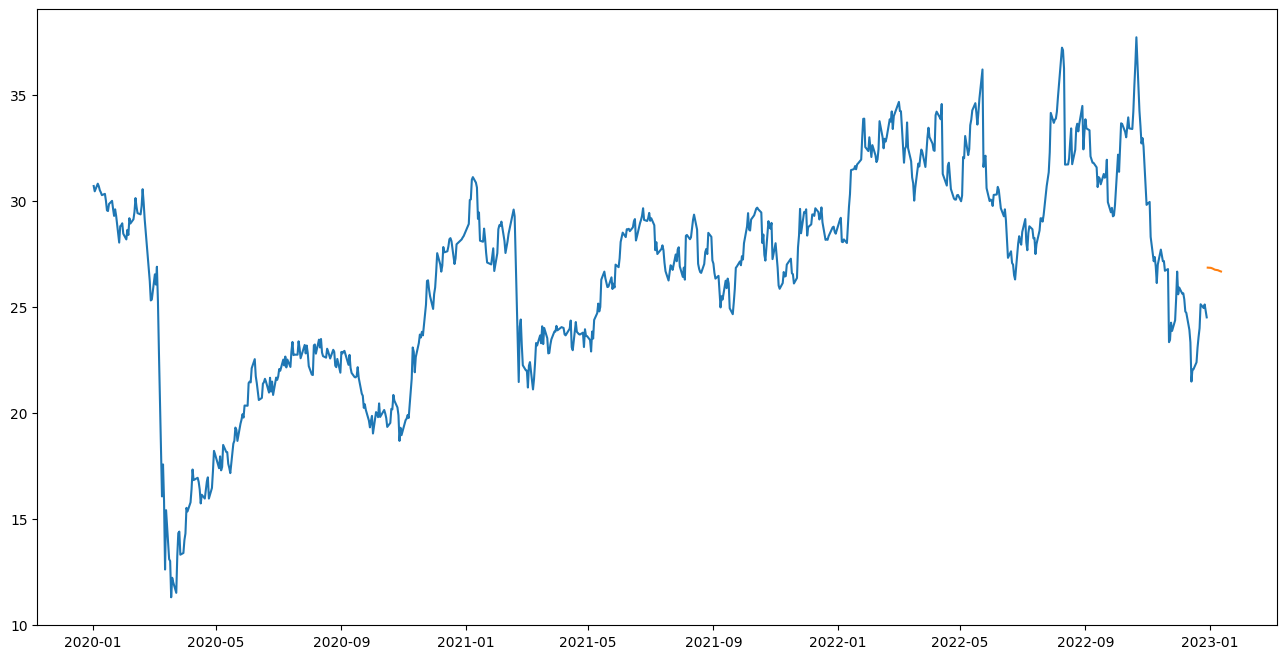

In [ ]:
#Plotar o ografico

plt.figure(figsize=(16,8))
plt.plot(df_sorted['preco_fechamento'])
plt.plot(df_forecast['preco_fechamento'])
plt.show